# Final project, Numerical Analysis 2018-2019


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [261]:
%pylab inline

# # input image dimensions
# img_rows, img_cols = 28, 28

# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
# import keras
# from keras.datasets import mnist

# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#     input_shape = (img_rows, img_cols)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib


/Users/hibozzy/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size', 'dist', 'time', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

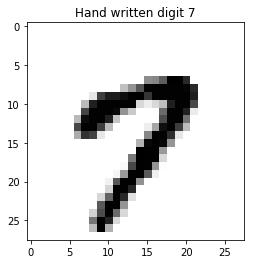

In [262]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

In [263]:
from functools import wraps
from time import time

def timing(func):
    """
    Use the decarator function for timing functions
    If not using the timeit version the time verison
    is less accurate but will save our purpose for testing 
    at the moment. The time is provided in seconds
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time()
        result = func(*args, **kwargs)
        end = time()
        print ('Elapsed time: {}'.format(end-start))
        return result
    return wrapper


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.



# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

In [264]:
"""
The cell provides defferent distance functions, that 
take 28,28 imeages as input returns a non negative number.
0 difference means that its the same image.
Also to note that I did not time the distance functions as they 
are used by other other functions which cause a bit of confusion
with the calling method's timer.This is beacuse timer is affected
by running process but timeit has stops some backgound process such 
as gabbage collector, use the most accurate time
"""
def d_infty(a, b):
    """defines the d_infinity in the """
    return numpy.max(numpy.abs(b - a))

def d_one(a, b):
    """Defines the d_one distance  """
    return numpy.sum(numpy.abs(b - a))

def d_two(a, b):
    """ Defines the d_two distance """
    return numpy.sqrt(numpy.sum(numpy.abs(a - b)**2))
    
# Use this for testing 
#d_infty(x_train[0], x_train[1])
#d_one(x_train[0], x_train[1])
#d_two(x_train[0], x_train[1])


# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).



In [265]:
@timing
def dist(n, distance, dataset):
    """
    @param n: the 1st N entries of xtran
    @param distance: d the distance 
    @param dataset: dataset to compute the distance matrix
    @return distance_matrix: reshaped distance matrix of (N,N)
    
    Use a numpy array constructor passing a list.
    use list comprehension to get n elements, by slicing in the 
    1 st n-1 rows and n-1 columns
    Reshape the resulting D array 
    Return the reshaped D[n,n]
    """
    D = numpy.array([distance(i, j) for i in dataset[:n] for j in dataset[:n]])

    return D.reshape(n,n) 


# USE THIS FOR TESTING 
#infinity_matrix = dist( 3, d_infty, x_train)
#d_one_mat = dist( 3, d_one, x_train)
#d_two_mat = dist( 3, d_two, x_train)

#print(infinity_matrix)
#print(d_one_mat)
#print(d_two_mat)

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

Elapsed time: 0.09127378463745117


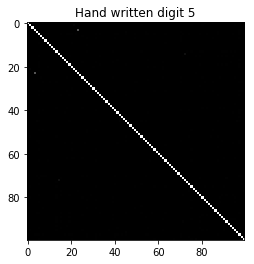

In [266]:
"""
compute distance matrix for the 1st 100 images
imgage below is for dinfinity
"""
N = 100
D_infinity = dist(N, d_infty, x_train)
imshow(D_infinity, cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

Elapsed time: 0.08667492866516113


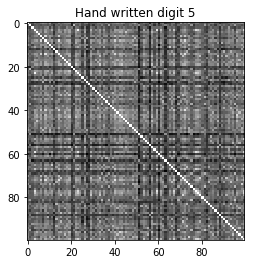

In [267]:
"""
imgage below is for d_one
"""
D_one = dist(N, d_one, x_train)
imshow(D_one, cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

Elapsed time: 0.11842703819274902


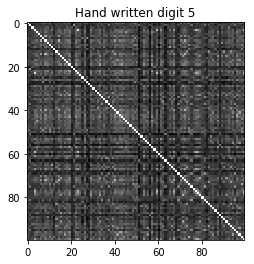

In [268]:
"""
imgage below is for d_two
"""
D_two = dist(N, d_two, x_train)
imshow(D_two, cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

In [269]:
def efficiency(dist_matrix, N,y_train):
    """
    @param dist: distnce function
    @param N: 1st N elements
    @param y_train: y_train dataset
    @return eff: denoted as num of error/num of elemenents
    
    equate j to the minimum distance
    if the index of the minimum distance of a row 
    is not equal to the y_train we know then that 
    is an error, increase the error
    """
    error_counter = 0
    for i in range(N):
        j = i
        dist_matrix[i,j] = dist_matrix[i ,j-1]
        j = numpy.argmin(dist_matrix[i])
        if(y_train[i] != y_train[j]):
            error_counter += 1  
            
    return error_counter/N;
    

In [270]:
# TEST efficiency
print(efficiency(D_infinity, N, y_train ))
print(efficiency(D_one, N, y_train))
print(efficiency(D_two, N, y_train))

0.58
0.17
0.17


# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and 
plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

** In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance **

Elapsed time: 0.08539199829101562
Elapsed time: 0.2779572010040283
Elapsed time: 1.2766289710998535
Elapsed time: 4.421266078948975
Elapsed time: 17.681970834732056
Elapsed time: 0.06734514236450195
Elapsed time: 0.27639293670654297
Elapsed time: 1.0913681983947754
Elapsed time: 4.38153600692749
Elapsed time: 17.743974924087524
Elapsed time: 0.1001589298248291
Elapsed time: 0.41256189346313477
Elapsed time: 1.6334261894226074
Elapsed time: 6.545619010925293
Elapsed time: 27.95148277282715


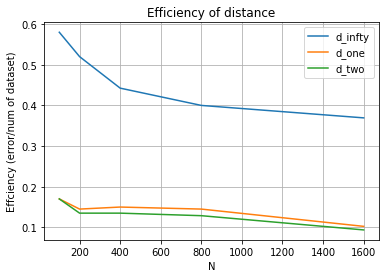

In [271]:
"""Compute and plot the efficiency"""
N = [100,200,400, 800, 1600]

error_infinity = [efficiency(dist( n, d_infty, x_train), n,y_train) for n in N]
error_one = [efficiency(dist( n, d_one, x_train), n,y_train) for n in N]
error_two = [efficiency(dist( n, d_two, x_train), n,y_train) for n in N]
_ = plot(N,error_infinity)
_ = plot(N,error_one)
_ = plot(N,error_two)
title("Efficiency of distance")
legend(["d_infty","d_one","d_two"])
xlabel('N')
ylabel('Effciency (error/num of dataset)')
grid()

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega =[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600



In [292]:
def comp(img,img1):  
    """
    @pram img:image function
    @pram img1: image1 function
    @return : return integration functions of image and image1
    """
    a = img/sum(img)    #fa la somma dei valori pixel per pixel---matrice 28X28
    b = img1/sum(img1)
    #return img*((1.0)/abs(img).sum((0,1))), img1*((1.0)/abs(img1).sum((0,1)))
    return a,b

def h_prime_dist(f1, f2):
    """
    h prime distance
    """
    a,b= comp(f1,f2) 
    c = a-b
    h_dist = absolute(gradient(c))**2 + (c)**2
    return numpy.sqrt(sum(h_dist))


Elapsed time: 0.8342869281768799


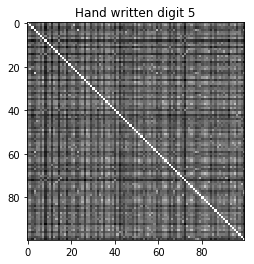

In [293]:
N = 100
h_matrix = dist(N, h_prime_dist, x_train)
imshow(h_matrix, cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

Elapsed time: 0.9367330074310303
Elapsed time: 4.068563938140869
Elapsed time: 15.3997061252594
Elapsed time: 56.90873599052429
Elapsed time: 230.03486394882202


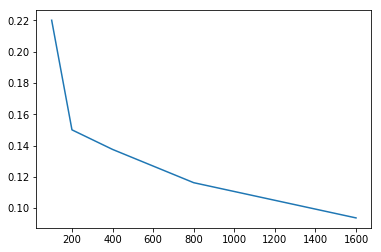

In [274]:
import matplotlib.pyplot as plt
M = [100,200,400,800,1600]
error_h_prime = [efficiency(dist(n, h_prime_dist, x_train), n , y_train) for n in M]
plt.plot(M,error_h_prime)

## Assignment 7

 An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

In [315]:
"""
Solving a linear system.
"""
Size = [100,200,400]

from scipy.sparse import *

def lpl(N):
    A = diags([-1,-1,4,-1,-1], [-N,-1, 0, 1,N], shape=(N*N,N*N)).toarray()
    for i in range(1,N):
        A[i*N,(i*N)-1] = 0
        A[(i*N)-1,i*N] = 0
    return A


def norm_gradient(f):
    grad = gradient(f)
    return  grad[0]**2 + grad[1]**2

def LU(N):
    return splu(csc_matrix(lpl(N)))

A = LU(len(x_train[0]) - 2 )  

def solve(img):
    ans = zeros((28,28))
    img = img[1:-1,1:-1]
    size = len(img)
    v = A.solve(img.reshape(-1)).reshape(size,size)
    ans[1:-1,1:-1]=v
    return ans

def D_MA(f1,f2):
    a,b = comp(f1,f2)
    phi = solve(a-b)
    func = (a+b)*norm_gradient(phi)
    return sum(func)
    


Elapsed time: 1.7113900184631348


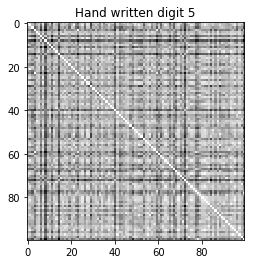

In [316]:
N = 100
dma_matrix = dist(N, D_MA, x_train)
imshow(dma_matrix, cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

Elapsed time: 1.6979660987854004
Elapsed time: 7.018285751342773
Elapsed time: 26.987703800201416
Elapsed time: 109.58519101142883
Elapsed time: 470.777530670166


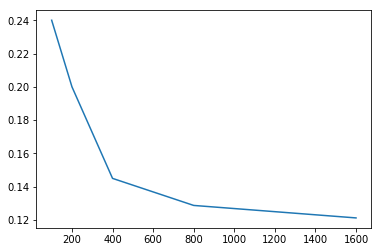

In [289]:
import matplotlib.pyplot as plt
M = [100,200,400,800,1600]
error_dma = [efficiency(dist(n, D_MA, x_train), n , y_train) for n in M]
plt.plot(M,error_dma)

## Assigment 8 (optional for DSSC, PhD and LM, Mandatory for MHPC)

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses one of the custom distances defined above**.

For each N in 3200,6400,12800,25600,51200, and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

In this exercise, I used called the balltree algorithm to query  the nearest neighbour.The fisrt graph shows when you return 1  nearest nighbour. An increase in the number of the neighbours has improved my perfomance slightly. 

In [276]:
from sklearn.neighbors import *
from numpy import *
import matplotlib.pyplot as plt

#n = 100
#N = [100,200,400,1600]

def get_sub_mat(n, buff):
    """
    Get the matrix of N size. You need to to reshape it since 
    Balltree expects 2 dimension not three. Multiply
    (28*28)= 784. Then reshape to N,784 a 2d array. 
    Intresting that reshape doesnt happen inplace make a
    copy.
    """
    img_buffer = reshape(buff[:n], (n,784))
    return img_buffer

#print(get_sub_mat(n, x_test)[:1])

In [277]:
def get_ball_tree(buff, func):
    return BallTree(xtrain, metric=func) 

In [278]:
def get_error(test_buff, train_buff,, N, func, kn):
    """
    @N number of the 1st N element
    @metr the type of distance matric to use
    """

    sliced_buff_test = reshape(test_buff[:N], (N,784))
    sliced_buff_train = reshape(train_buff[:N], (N,784))
    
    bt = get_ball_tree(sliced_buff_train, func)
    dist,ind = bt.query(sliced_buff_test[:N], k=kn)    
    k_neibours = np.array([ [y_train[ind[i,j]] for j in range(kn)] for i in arange(N) ])
    error_counter = 0
    for i in range(N):
        counts = np.bincount(k_neibours[i,:])
        freq = np.argmax(counts)
        if (freq != y_test[i]):
            error_counter +=1  
        
    return error_counter/N
  
#n = get_error(x_test,x_train,6,d_infty,10)
#print(n)



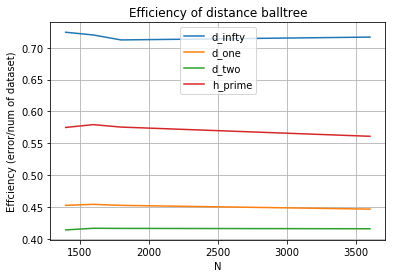

In [295]:
size =[1400,1600,1800, 3600]
error_infinity = [get_error(x_test,x_train,n,d_infty,2) for n in size]
error_one = [get_error(x_test,x_train,n,d_one,2) for n in size]
error_two = [get_error(x_test,x_train,n,d_two,2) for n in size]
h_prime = [get_error(x_test,x_train,n,h_prime_dist,2) for n in size]
#error_dma = [get_error(x_test,x_train,n,D_MA,2) for n in size]

_ = plot(size,error_infinity)
_ = plot(size,error_one)
_ = plot(size,error_two)
_ = plot(size,h_prime)
#_ = plot(size,error_dma)

title("Efficiency of distance balltree")
legend(["d_infty","d_one","d_two", "h_prime"])
xlabel('N')
ylabel('Effciency (error/num of dataset)')
grid()

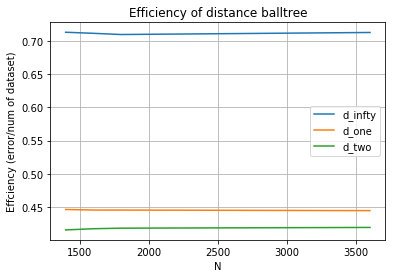

In [281]:
size =[1400,1600,1800, 3600]
error_infinity = [get_error(x_test,x_train,n,d_infty,4) for n in size]
error_one = [get_error(x_test,x_train,n,d_one,4) for n in size]
error_two = [get_error(x_test,x_train,n,d_two,4) for n in size]
h_prime = [get_error(x_test,x_train,n,h_prime_dist,4) for n in size]
#error_dma = [get_error(x_test,x_train,n,D_MA,2) for n in size]

_ = plot(size,error_infinity)
_ = plot(size,error_one)
_ = plot(size,error_two)
_ = plot(size,h_prime)
#_ = plot(size,error_dma)

title("Efficiency of distance balltree")
legend(["d_infty","d_one","d_two", "h_prime"])
xlabel('N')
ylabel('Effciency (error/num of dataset)')
grid()

In [ ]:
size =[1400,1600,1800, 3600]
error_infinity = [get_error(x_test,x_train,n,d_infty,8) for n in size]
error_one = [get_error(x_test,x_train,n,d_one,8) for n in size]
error_two = [get_error(x_test,x_train,n,d_two,8) for n in size]
h_prime = [get_error(x_test,x_train,n,h_prime_dist,8) for n in size]
#error_dma = [get_error(x_test,x_train,n,D_MA,2) for n in size]

_ = plot(size,error_infinity)
_ = plot(size,error_one)
_ = plot(size,error_two)
_ = plot(size,h_prime)
#_ = plot(size,error_dma)

title("Efficiency of distance balltree")
legend(["d_infty","d_one","d_two", "h_prime"])
xlabel('N')
ylabel('Effciency (error/num of dataset)')
grid()